# 数値計算  
- **Submission date**: 2017/10/27
- **Team**: へび  
- **Members**:  
    + #5501 Kazunori Sakai  
    + #5531 Akihiro Nitta  
    + #5557 Yuki Kotakehara  

## モジュールの読み込み  
- [NumPy](http://www.numpy.org)  
- [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.linalg as linalg

## 3.8 課題 [p. 30]
**1**. 下の図は 
$
A :=
\left(
\begin{array}{ccc}
3 & 2/3 \\
2/3 & 2  \\
\end{array}
\right)
$
を用いて変換される像を表わしている．この行列の固有値，行列式が何処に対応するか説明せよ．また，固有ベクトルの方向を記せ．(2007年度期末試験)

<img src="./figs/asgmt04_fig1.png">

In [2]:
np.set_printoptions(precision=3, suppress=True)

a = np.array([[3,2/3], [2/3,2]])

l,P = np.linalg.eig(a)
pprint(l)
pprint(P)

v0 = P[:,0]
v1 = P[:,1]
pprint(v0)
pprint(v1)

transformation matrix:
[[ 3.     0.667]
 [ 0.667  2.   ]]
eigenvalues:
[ 3.333  1.667]
eigenvectors:
[[ 0.894 -0.447]
 [ 0.447  0.894]]
X: (2, 32)
A: (2, 2)
X_: (2, 32)
x: (32,)
y: (32,)
eig_values: (2,)
eig_vectors: (2, 2)


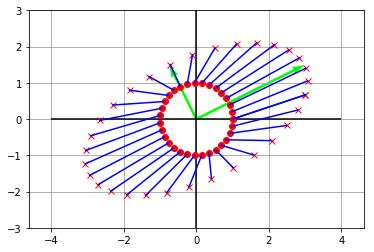

In [8]:
# setting
np.set_printoptions(precision=3, suppress=True)

# generate data matrix
def f(x):
    return np.sqrt(1-x**2)
theta = np.linspace(0, 2*np.pi, 32)
x = np.cos(theta)
y = np.sin(theta)
X = np.array([[x[i], y[i]] for i in range(len(x))])
X = X.T

# define transformation matrix
A = np.array([[3, 2/3], [2/3, 2]])

t=7
plt.plot([-t*v0[0],t*v0[0]], [-t*v0[1],t*v0[1]], color='g', linestyle='-', linewidth=2)
t=5
plt.plot([-t*v1[0],t*v1[0]], [-t*v1[1],t*v1[1]], color='g', linestyle='-', linewidth=2)


# calculate eigenvalues and eigenvectors
## eig_vectors[:, i]がeig_values[i]に対応する
eig_values, eig_vectors= np.linalg.eig(A)


# calculate the determinant of A
det_A = np.linalg.det(A)

print('transformation matrix:\n' + str(A))
print('eigenvalues:\n' + str(eig_values))
print('eigenvectors:\n' + str(eig_vectors))
print('X: ' + str(X.shape))
print('A: ' + str(A.shape))
print('X_: ' + str(X_.shape))
print('x: ' + str(x.shape))
print('y: ' + str(y.shape))
print('eig_values: ' + str(eig_values.shape))
print('eig_vectors: ' + str(eig_vectors.shape))

# draw graph
## plot the data
plt.plot(X[0, :], X[1, :], 'o', color='red')
## plot the transformed data
plt.plot(X_[0, :], X_[1, :], 'x', color='red')
## plot lines between the original data and transformed data
for i in range(len(x)):
    plt.plot([X[0, i], X_[0, i]], [X[1, i], X_[1, i]], linestyle='-', color='#0000ff')
## draw eigenvectors
### lengths of the arrows are weighted with their eigenvalues
plt.quiver(0, 0, eig_values[0]*eig_vectors[0, 0], eig_values[0]*eig_vectors[1, 0], angles='xy', scale_units='xy', scale=1, color='#00ff00')
plt.quiver(0, 0, eig_values[1]*eig_vectors[0, 1], eig_values[1]*eig_vectors[1, 1], angles='xy', scale_units='xy', scale=1, color='#00ff00')
## format graph
plt.hlines(0, -4, 4, color='black', linestyle='-')
plt.vlines(0, -3, 3, color='black', linestyle='-')
plt.grid(color='#9f9f9f')
plt.axis('equal')
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.show()

### 説明  

#### 固有値  
- 各点が，その固有値に属する固有ベクトル方向へ，その固有値倍されることに対応する．  

#### 行列式  
- 正方行列 $A$ による写像を $f$ とする．
    - $\det A \ne 0$ の時，写像 $f$ は全単射となる．即ち，核空間 $Ker A = \{{\bf 0}\} $ となる．また，核空間が $\{\bf 0\}$ であることからわかるように，逆写像を作ることができるため，変換行列 $A$ の逆行列 $A^{-1}$ が存在する．
    - $\det A = 0$ の時，写像 $f$ はとなる．即ち，核空間 $Ker A \ne \{{\bf 0}\} $ となる．この時写った先では，次元数が写像元空間の次元数未満となるため，逆写像を用いて完全に復元することができなくなる．
- この問題の行列では，その行列式の値は0ではないので，次元数が変わらず，像空間は$\mathbb{R}^2$となる．これは上の図からも確認することができる．

- 正方行列 $A$ を成す全ての列ベクトル，もしくは全ての行ベクトルで構成される平行四辺形の面積 $S$ は行列式 $\det A$ で計算することができる．（ただし，$S$ は正負の値どちらも取りうる．）  [参考資料: 線型代数学，著・笠原晧司，サイエンス社]

---
## Note  
- データ行列$X$ ($D\times N$行列)  
    - $D$: データ点の次元数  
    - $N$: データ数  
$$ X = ({\bf x}_1,...,{\bf x}_N)$$  

- データ点${\bf x}_i$
$${\bf x}_i = (x_i, y_i)^{\rm T}$$

- `numpy.linalg.eig(A)` についてのメモ [[doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)]  
    + **入力**: **正方**行列（NumPy配列 $M\times M$ ）  
    + **出力**: 固有値の配列，固有ベクトルの配列  
    + **使用例**
    ```python  
    A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    eig_vals, eig_vecs = np.linalg.eig(A)
    ```  
    + **注意**: 固有ベクトル `v[:, i]` は，固有値 `eig_vals[i]` に対応する
    + `scipy.linalg.eig`もあるみたい．  違いは知らない．  